# pandas入门

含有使数据清洗和分析工作变得更快更简单的数据结构和操作工具。pandas经常和其它工具一同使用，如数值计算工具NumPy和SciPy，分析库statsmodels和scikit-learn，和数据可视化库matplotlib。pandas是基于NumPy数组构建的，特别是基于数组的函数和不使用for循环的数据处理。
pands的导入方式为：

In [1]:
import pandas as pd

因为Series和DataFrame用的次数非常多，所以将其引入本地命名空间中会更方便：

In [2]:
from pandas import Series, DataFrame

## pandas数据结构介绍

要使用pandas，你首先就得熟悉它的两个主要数据结构：`Series`和`DataFrame`。虽然它们并不能解决所有问题，但它们为大多数应用提供了一种可靠的、易于使用的基础。

### Series

Series是一种类似于一维数组的对象，包含了一个值序列（与NumPy中的类型相似），并且包含了数据标签，称为索引（index）。最简单的序列可以仅由一个数组形成：

In [3]:
obj = pd.Series([4, 7, -5, 3])

In [4]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过Series 的`values`和`index`属性获取其数组表示形式和索引对象：

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

通常需要创建一个索引序列， 用标签标识每个数据点：

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [9]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [10]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Series拥有以下常用属性和方法：
- 属性
    - index属性，得到的是Index对象
    - index 的name属性
    - values属性，得到的是array对象
- 方法
    - describe()
    - value_counts()
    - unique()
    - nunique()
    - mean()
    - plot()

与普通NumPy数组相比，你可以通过索引的方式选取Series中的单个或一组值：

In [11]:
obj2['a']

-5

In [12]:
obj2['d'] = 6

In [13]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

['c', 'a', 'd']是索引列表，即使它包含的是字符串而不是整数。

使用NumPy函数或类似NumPy的运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数等）都会保留索引值的链接：

In [14]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [15]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [17]:
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

还可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [18]:
'b' in obj2

True

In [19]:
'e' in obj2

False

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series：

In [21]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [22]:
obj3 = pd.Series(sdata)

In [23]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [24]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [25]:
obj4 = pd.Series(sdata, index=states)

In [26]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

在这个例子中，sdata中跟states索引相匹配的那3个值会被找出来并放到相应的位置上，但由于"California"所对应的sdata值找不到，所以其结果就为NaN（即“非数字”（not a number），在pandas中，它用于表示缺失或NA值）。因为‘Utah’不在states中，它被从结果中除去。

我将使用缺失（missing）或NA表示缺失数据，pandas的isnull和notnull函数可用于检测缺失数据：

In [27]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [28]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series也有类似的实例方法：

In [30]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [31]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

对于许多应用而言，Series最重要的一个功能是，它会根据运算的索引标签自动对齐数据：

In [32]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [33]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [34]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series对象**本身及其索引**都有一个`name`属性，该属性跟pandas其他的关键功能关系非常密切：

In [35]:
obj4.name = 'population'

In [36]:
obj4.index.name = 'state'

In [37]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series的索引可以通过赋值的方式就地修改：

In [38]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [39]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [40]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### Dataframe

DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。DataFrame中的数据是以一个或多个二维块存放的（而不是列表、字典或别的一维数据结构）。
虽然DataFrame是以二维结构保存数据的，但你仍然可以轻松地将其表示为更高维度的数据（层次化索引的表格型结构，这是pandas中许多高级数据处理功能的关键要素）。


构建DataFrame的办法有很多，最常用的一种是直接传入一个由等长列表或NumPy数组组成的字典：

In [41]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

产生的DataFrame会自动加上索引（跟Series一样），且全部列会被**有序排列**：

In [42]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


对于特别大的DataFrame，`head`方法会选取前五行：

In [43]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列：

In [45]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的列在数据中找不到，就会在结果中产生缺失值：

In [46]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four','five', 'six'])

In [47]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [48]:
frame2['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [49]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

> IPython提供了类似属性的访问（即frame2.year）和tab补全。 frame2[column]适用于任何列的名，但是frame2.column只有在列名是一个合理的Python变量名时才适用。

注意，返回的Series拥有原DataFrame相同的索引，且其name属性也已经被相应地设置好了。

行也可以通过位置或名称的方式进行获取，比如用loc属性（稍后将对此进行详细讲解）：

In [53]:
frame2.loc['three']

pandas.core.series.Series

列可以通过赋值的方式进行修改。例如，我们可以给那个空的"debt"列赋上一个标量值或一组值：

In [55]:
frame2['debt'] = 16.5

In [56]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [57]:
frame2['debt'] = np.arange(6.)

In [58]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值：

In [59]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [60]:
frame2['debt'] = val

In [61]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列，关键字`del`用于删除列。

In [62]:
frame2['eastern'] = frame2.state == 'Ohio'

In [63]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


**注意：不能用frame2.eastern创建新的列。**

In [64]:
del frame2['eastern']

In [66]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

> 注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改全都会反映到源DataFrame上。通过Series的copy方法即可指定复制列。

另一种常见的数据形式是嵌套字典,如果嵌套字典传给DataFrame，pandas就会被解释为：外层字典的键作为列，内层键则作为行索引：

In [67]:
 pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [68]:
frame3 = pd.DataFrame(pop)

In [69]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


你也可以使用类似NumPy数组的方法，对DataFrame进行转置（交换行和列）：

In [70]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不会这样：

In [71]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


如果设置了DataFrame的index和columns的name属性，则这些信息也会被显示出来：

In [74]:
frame3.index.name = 'year'
frame3.columns.name = 'state'

In [75]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


跟Series一样，values属性也会以二维ndarray的形式返回DataFrame中的数据：

In [76]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

如果DataFrame各列的数据类型不同，则值数组的dtype就会选用能兼容所有列的数据类型：

In [77]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

DataFrame拥有以下常用属性和方法：
- 属性
    - dtypes
    - index
    - cloumns
    - values
- 方法
    - head()：查看数据的前5行，也可以指定行数n
    - tail()：查看数据的后5行，也可以指定行数n
    - describe()：描述显示数据快速统计摘要
    - sort()：分为sort_index，sort_values等

### 索引对象

pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index：

In [78]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [79]:
index = obj.index

In [80]:
index

Index(['a', 'b', 'c'], dtype='object')

In [81]:
index[1:]

Index(['b', 'c'], dtype='object')

Index对象是**不可变**的，因此用户不能对其进行修改。

不可变可以使Index对象在多个数据结构之间安全共享：

In [83]:
labels = pd.Index(np.arange(3))

In [84]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [85]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [86]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [87]:
obj2.index is labels

True

除了类似于数组，Index的功能也类似一个固定大小的集合：

In [88]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [89]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [90]:
'Ohio' in frame3.columns

True

In [92]:
2003 in frame3.columns

False

与python的集合不同，pandas的Index可以包含重复的标签：

In [93]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [94]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

根据重复标签进行筛选，会选取所有重复标签对应的数据。
每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含的数据的常见问题。

## 基本功能

本节中将介绍操作Series和DataFrame中的数据的基本手段。

### 重建索引

pandas对象的一个重要方法是reindex，其作用是创建一个新对象，它的数据符合新的索引。看下面的例子：

In [95]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [96]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

用该Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值：

In [97]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [98]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于顺序数据，比如时间序列，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用`ffill`可以实现前向值填充：

In [99]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [100]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [104]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [102]:
obj3

0      blue
2    purple
4    yellow
dtype: object

借助DataFrame，reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行：

In [105]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])

In [106]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [107]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [108]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


列可以用`columns`关键字重新索引：

In [109]:
states = ['Texas', 'Utah', 'California']

In [110]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### 轴向上删除条目

丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于需要执行一些数据整理和集合逻辑，所以`drop`方法返回的是一个在指定轴上删除了指定值的新对象：

In [111]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [112]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [113]:
new_obj = obj.drop('c')

In [114]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [115]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

在DataFrame中，索引值可以重轴向上删除：

In [116]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])

In [117]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


用标签序列调用drop会从行标签（axis 0）删除值：

In [118]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


通过传递axis=1或axis='columns'可以删除列的值：

In [119]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [120]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [121]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


许多函数，如drop，会修改Series或DataFrame的大小或形状，可以就地修改对象，不会返回新的对象：

In [122]:
obj.drop('c', inplace=True)

In [123]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

小心使用inplace，它会销毁所有被删除的数据。

### 索引、选择与过滤

Series索引（obj[...]）的工作方式类似于NumPy数组的索引，只不过Series的索引值不只是整数。下面是几个例子：

In [124]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [125]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [126]:
obj['b']

1.0

In [127]:
obj[1]

1.0

In [128]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [129]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [130]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [131]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

利用标签的切片运算与普通的Python切片运算不同，其末端是包含的：

In [132]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

用切片可以对Series的相应部分进行设置：

In [133]:
obj['b':'c'] = 5

In [134]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

用一个值或序列对DataFrame进行索引其实就是获取一个或多个列：

In [135]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
   .....:                     index=['Ohio', 'Colorado', 'Utah', 'New York'],
   .....:                     columns=['one', 'two', 'three', 'four'])

In [136]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [137]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [138]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


这种索引方式有几个特殊的情况。首先通过切片或布尔型数组选取数据：

In [139]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [140]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15



选取行的语法data[:2]十分方便。向[ ]传递单一的元素或列表，就可选择列。

另一种用法是通过布尔型DataFrame（比如下面这个由标量比较运算得出的）进行索引：

In [141]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [142]:
data[data < 5] = 0

In [143]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


这使得DataFrame的语法与NumPy二维数组的语法很像。

#### 使用loc和iloc选择数据

对于DataFrame的行的标签索引，引入了特殊的标签运算符loc和iloc。它们可以让你用类似NumPy的标记，使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

作为一个初步示例，让我们通过标签选择一行和多列：

In [144]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

然后用iloc和整数进行选取：

In [145]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [146]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

这两个索引函数也适用于一个标签或多个标签的切片：

In [147]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [148]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


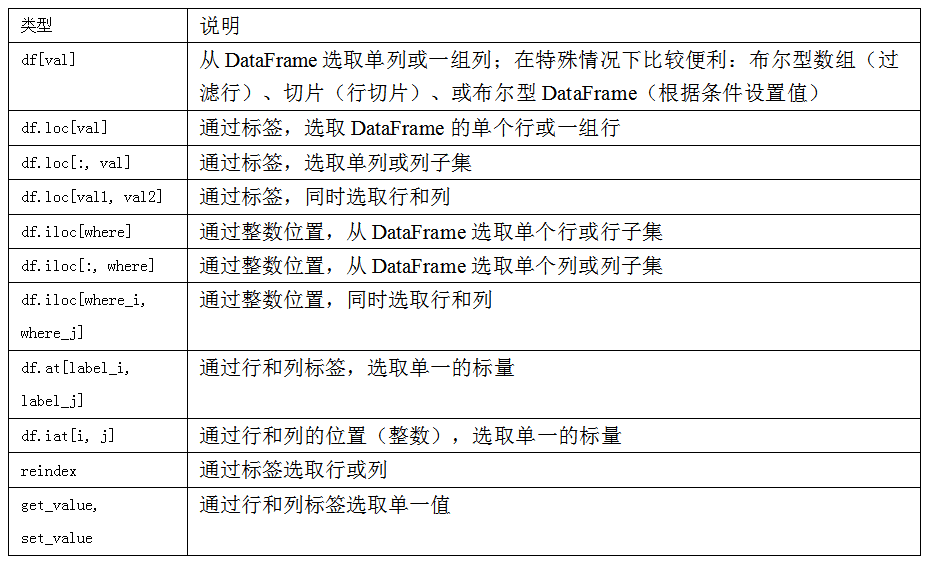

### 整数索引

处理整数索引的pandas对象常常难住新手，因为它与Python内置的列表和元组的索引语法不同。例如，你可能不认为下面的代码会出错：

In [153]:
ser = pd.Series(np.arange(3.))
ser
# ser[-1]

0    0.0
1    1.0
2    2.0
dtype: float64

另外，对于非整数索引，不会产生歧义：

In [152]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使用`loc`（标签）或`iloc`（整数）：

In [154]:
ser[:1]

0    0.0
dtype: float64

In [155]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [156]:
ser.iloc[:1]

0    0.0
dtype: float64

### 算术和数据对齐

pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于有数据库经验的用户，这就像在索引标签上进行自动外连接。看一个简单的例子：

In [157]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [158]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [159]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [160]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [161]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

对于DataFrame，对齐操作会同时发生在行和列上：

In [162]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])

In [163]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [164]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [165]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [166]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列均不在两个DataFrame对象中，在结果中以缺省值呈现。行也是同样。

如果DataFrame对象相加，没有共用的列或行标签，结果都会是空：

In [167]:
 df1 = pd.DataFrame({'A': [1, 2]})

In [168]:
 df2 = pd.DataFrame({'B': [3, 4]})

In [169]:
df1

,A
0,1
1,2


In [170]:
df2

,B
0,3
1,4


In [171]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### 使用填充值的算术方法

在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值（比如0）：

In [173]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [174]:
df2.loc[1, 'b'] = np.nan

In [175]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [176]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


将它们相加时，没有重叠的位置就会产生NA值：

In [177]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用df1的`add`方法，传入df2以及一个`fill_value`参数：

In [178]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


表5-5列出了Series和DataFrame的算术方法。它们每个都有一个副本，以字母`r`开头，它会翻转参数。因此这两个语句是等价的：

In [179]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [180]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


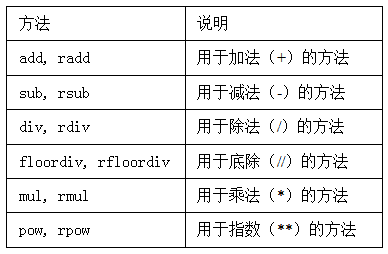

与此类似，在对Series或DataFrame重新索引时，也可以指定一个填充值：

In [182]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### DataFrame和Series间的操作

In [183]:
arr = np.arange(12.).reshape((3, 4))

In [184]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [185]:
arr[0]

array([0., 1., 2., 3.])

In [188]:
arr - arr[0]

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播（broadcasting），附录A将对此进行详细讲解。DataFrame和Series之间的运算差不多也是如此：

In [189]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
   .....:                      columns=list('bde'),
   .....:                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [190]:
series = frame.iloc[0]

In [191]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [192]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

默认情况下，DataFrame和Series之间的算术运算会将Series的索引**匹配到DataFrame的列**，然后沿着行一直向下广播：

In [193]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集：

In [194]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [195]:
series2

b    0
e    1
f    2
dtype: int64

In [196]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


如果你希望匹配行且在列上广播，则必须使用算术运算方法。例如：

In [197]:
series3 = frame['d']

In [198]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [200]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [201]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的轴号就是希望匹配的轴。在本例中，我们的目的是匹配DataFrame的行索引（axis='index' or axis=0）并进行广播。

### 函数应用和映射

NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象：

In [202]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
   .....:                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [203]:
frame

,b,d,e
Utah,0.746261,1.161429,1.746193
Ohio,0.120127,-0.690722,-1.875026
Texas,1.852496,0.293844,0.461549
Oregon,-0.815477,0.494431,0.853316


In [204]:
np.abs(frame)

,b,d,e
Utah,0.746261,1.161429,1.746193
Ohio,0.120127,0.690722,1.875026
Texas,1.852496,0.293844,0.461549
Oregon,0.815477,0.494431,0.853316


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame的`apply`方法即可实现此功能：

In [205]:
f = lambda x: x.max() - x.min()

In [206]:
frame.apply(f)

b    2.667973
d    1.852151
e    3.621219
dtype: float64

这里的函数f，计算了一个Series的最大值和最小值的差，在frame的每列都执行了一次。结果是一个Series，使用frame的列作为索引。

如果传递axis='columns'到apply，这个函数会在每行执行：

In [208]:
frame.apply(f, axis='columns')

Utah      0.999932
Ohio      1.995153
Texas     1.558652
Oregon    1.668792
dtype: float64

许多最为常见的数组统计功能都被实现成DataFrame的方法（如sum和mean），因此无需使用apply方法。

传递到apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series：

In [209]:
 def f(x):
   .....:     return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [210]:
frame.apply(f)

,b,d,e
min,-0.815477,-0.690722,-1.875026
max,1.852496,1.161429,1.746193


元素级的Python函数也是可以用的。假如你想得到frame中各个浮点值的格式化字符串，使用applymap即可：

In [211]:
format = lambda x: '%.2f' % x

In [212]:
frame.applymap(format)

,b,d,e
Utah,0.75,1.16,1.75
Ohio,0.12,-0.69,-1.88
Texas,1.85,0.29,0.46
Oregon,-0.82,0.49,0.85


之所以叫做applymap，是因为Series有一个用于应用元素级函数的map方法：

In [213]:
frame['e'].map(format)

Utah       1.75
Ohio      -1.88
Texas      0.46
Oregon     0.85
Name: e, dtype: object

### 排序和排名

根据条件对数据集排序（sorting）也是一种重要的内置运算。要对行或列索引进行排序（按字典顺序），可使用sort_index方法，它将返回一个已排序的新对象：

In [215]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [217]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

对于DataFrame，则可以根据任意一个轴上的索引进行排序：

In [219]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
   .....:                      index=['three', 'one'],
   .....:                      columns=['d', 'a', 'b', 'c'])

In [220]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [221]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是按升序排序的，但也可以降序排序：

In [222]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


若要按值对Series进行排序，可使用其sort_values方法：

In [223]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

在排序时，任何缺失值默认都会被放到Series的末尾：

In [225]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [227]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

当排序一个DataFrame时，你可能希望根据一个或多个列中的值进行排序。将一个或多个列的名字传递给sort_values的by选项即可达到该目的：

In [228]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [229]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [230]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [231]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


排名会从1开始一直到数组中有效数据的数量。接下来介绍Series和DataFrame的rank方法。默认情况下，rank是通过“为各组分配一个平均排名”的方式破坏平级关系的：

In [232]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [234]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

也可以根据值在原数据中出现的顺序给出排名：

In [235]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

这里，条目0和2没有使用平均排名6.5，它们被设成了6和7，因为数据中标签0位于标签2的前面。

你也可以按降序进行排名：

In [236]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

表5-6列出了所有用于破坏平级关系的method选项。DataFrame可以在行或列上计算排名：

In [238]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
   .....:                       'c': [-2, 5, 8, -2.5]})

In [239]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [240]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 含有重复标签的轴索引

直到目前为止，我所介绍的所有范例都有着唯一的轴标签（索引值）。虽然许多pandas函数（如reindex）都要求标签唯一，但这并不是强制性的。我们来看看下面这个简单的带有重复索引值的Series：

In [241]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [242]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

索引的is_unique属性可以告诉你它的值是否是唯一的：

In [243]:
obj.index.is_unique

False

对于带有重复值的索引，数据选取的行为将会有些不同。如果某个索引对应多个值，则返回一个Series；而对应单个值的，则返回一个标量值：

In [244]:
obj['a']

a    0
a    1
dtype: int64

In [245]:
obj['c']

4

这样会使代码变复杂，因为索引的输出类型会根据标签是否有重复发生变化。

对DataFrame的行进行索引时也是如此：

In [246]:
 df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [247]:
df

,0,1,2
a,0.624076,-0.170280,0.818061
a,-1.023821,1.605796,0.043788
b,-0.892136,-1.180503,0.065337
b,-2.357761,0.278821,0.212740


In [248]:
df.loc['b']

,0,1,2
b,-0.892136,-1.180503,0.065337
b,-2.357761,0.278821,0.212740


## 描述性统计的概述与计算

pandas对象拥有一组常用的数学和统计方法。它们大部分都属于约简和汇总统计，用于从Series中提取单个值（如sum或mean）或从DataFrame的行或列中提取一个Series。跟对应的NumPy数组方法相比，它们都是基于没有缺失数据的假设而构建的。看一个简单的DataFrame：

In [249]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
   .....:                    [np.nan, np.nan], [0.75, -1.3]],
   .....:                   index=['a', 'b', 'c', 'd'],
   .....:                   columns=['one', 'two'])

In [250]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法将会返回一个含有列的和的Series：

In [252]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入axis='columns'或axis=1将会按行进行求和运算：

In [253]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能：

In [254]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

有些方法（如idxmin和idxmax）返回的是间接统计（比如达到最小值或最大值的索引）：

In [255]:
df.idxmax()

one    b
two    d
dtype: object

另一些方法则是累计型的：

In [256]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，它既不是约简型也不是累计型。describe就是一个例子，它用于一次性产生多个汇总统计：

In [257]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于非数值型数据，describe会产生另外一种汇总统计：

In [258]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [259]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### 相关性和协方差

有些汇总统计（如相关系数和协方差）是通过参数对计算出来的。我们来看几个DataFrame，它们的数据来自Yahoo!Finance的股票价格和成交量，使用的是pandas-datareader包（可以用conda或pip安装）：

### 唯一值、计数和成员属性

还有一类方法可以从一维Series的值中抽取信息。看下面的例子：

In [260]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

第一个函数是unique，它可以得到Series中的唯一值数组：

In [261]:
uniques = obj.unique()

In [262]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的唯一值是未排序的，如果需要的话，可以对结果再次进行排序（uniques.sort()）。相似的，value_counts用于计算一个Series中各值出现的频率：

In [263]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

为了便于查看，结果Series是按值频率降序排列的。`value_counts`还是一个顶级pandas方法，可用于任何数组或序列：

In [265]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
b    2
d    1
dtype: int64

isin用于判断矢量化集合的成员资格，可用于过滤Series中或DataFrame列中数据的子集：

In [266]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [267]:
mask = obj.isin(['b', 'c'])

In [268]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [269]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

与isin类似的是Index.get_indexer方法，它可以给你一个索引数组，从可能包含重复值的数组到另一个不同值的数组：

In [270]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [271]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [272]:
pd.Index(unique_vals).get_indexer(to_match)b

array([0, 2, 1, 1, 0, 2], dtype=int64)

有时，你可能希望得到DataFrame中多个相关列的一张柱状图。例如：

In [274]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
   .....:                      'Qu2': [2, 3, 1, 2, 3],
   .....:                      'Qu3': [1, 5, 2, 4, 4]})

In [275]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


将pandas.value_counts传给该DataFrame的apply函数，就会出现：

In [276]:
result = data.apply(pd.value_counts).fillna(0)

In [277]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


这里，结果中的行标签是所有列的唯一值。后面的频率值是每个列中这些值的相应计数。